### Analyse data daily-sea-ice-extent National Snow & Ice Data Center 

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.startml import *
from Starts.startvis import *
from Starts.startspk import *
%matplotlib inline

local_kwargs {'data_path': './data/daily-sea-ice-extent-data/seaice.csv, ./data/nsidc_ice_extent.csv, ./data/north_ice_extent.csv, ./data/south_ice_extent.csv, ./data/glacier-inventory/database.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
ice = idata[0]
ice.head()

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north


In [3]:
ice['Time'] = pd.to_datetime(dict(year=ice.Year, month=ice.Month, day=ice.Day))

In [4]:
StartML.convert_time_series(data=ice, time_column='Time').head()

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
Time,,,,,,,
1978-10-26,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
1978-10-26,1978,10,26,17.624,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
1978-10-28,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
1978-10-28,1978,10,28,17.803,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,south
1978-10-30,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north


In [5]:
nsidc_ice = ice[['Extent', 'hemisphere']]
nsidc_ice.head()

,Extent,hemisphere
Time,,
1978-10-26,10.231,north
1978-10-28,10.420,north
1978-10-30,10.557,north
1978-11-01,10.670,north
1978-11-03,10.777,north


In [6]:
north_ice = nsidc_ice[nsidc_ice['hemisphere']=='north'] 
north_ice.head()

,Extent,hemisphere
Time,,
1978-10-26,10.231,north
1978-10-28,10.420,north
1978-10-30,10.557,north
1978-11-01,10.670,north
1978-11-03,10.777,north


In [7]:
north_ice = north_ice.drop(['hemisphere'], axis=1)
north_ice.head()

,Extent
Time,
1978-10-26,10.231
1978-10-28,10.420
1978-10-30,10.557
1978-11-01,10.670
1978-11-03,10.777


In [8]:
south_ice = nsidc_ice[nsidc_ice['hemisphere']=='south']
south_ice.head()

,Extent,hemisphere
Time,,
1978-10-26,17.624,south
1978-10-28,17.803,south
1978-10-30,17.670,south
1978-11-01,17.527,south
1978-11-03,17.486,south


In [9]:
south_ice = south_ice.drop(['hemisphere'], axis=1)
south_ice.head()

,Extent
Time,
1978-10-26,17.624
1978-10-28,17.803
1978-10-30,17.670
1978-11-01,17.527
1978-11-03,17.486


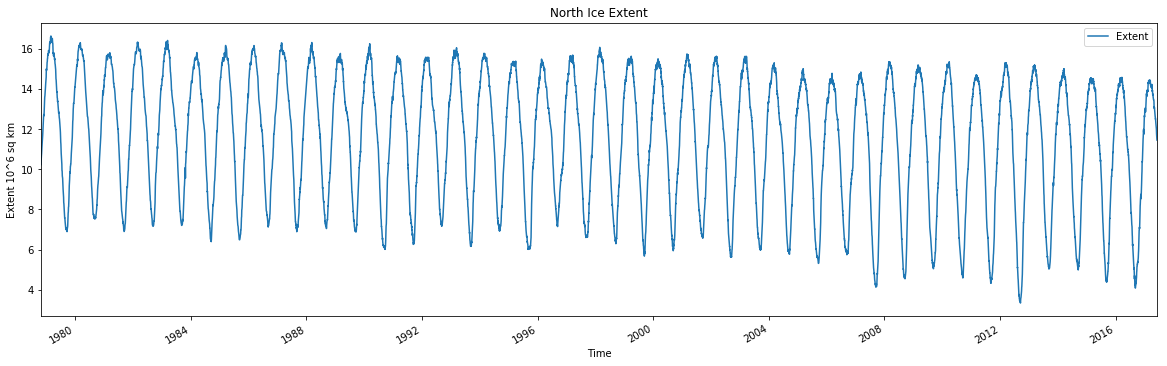

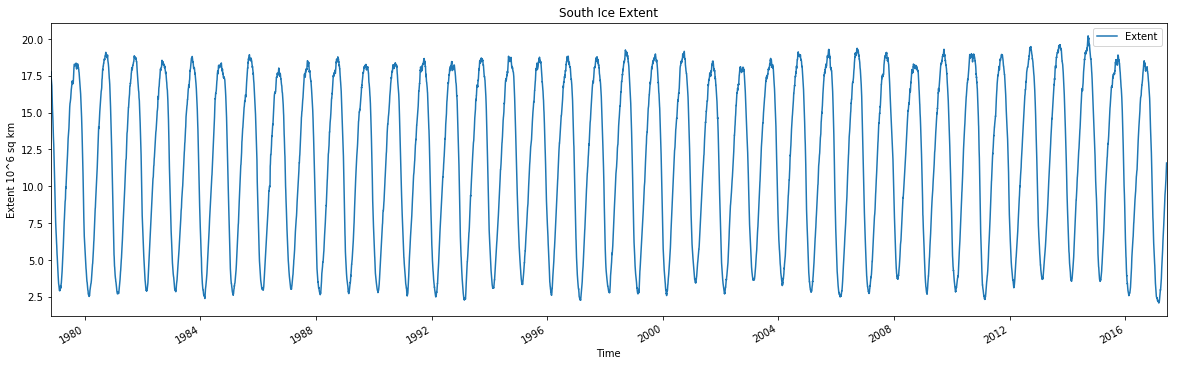

In [10]:
# Visual plot
north_ice.plot(figsize=(20,6), title='North Ice Extent')
plt.ylabel('Extent 10^6 sq km')
south_ice.plot(figsize=(20,6), title='South Ice Extent')
plt.ylabel('Extent 10^6 sq km')

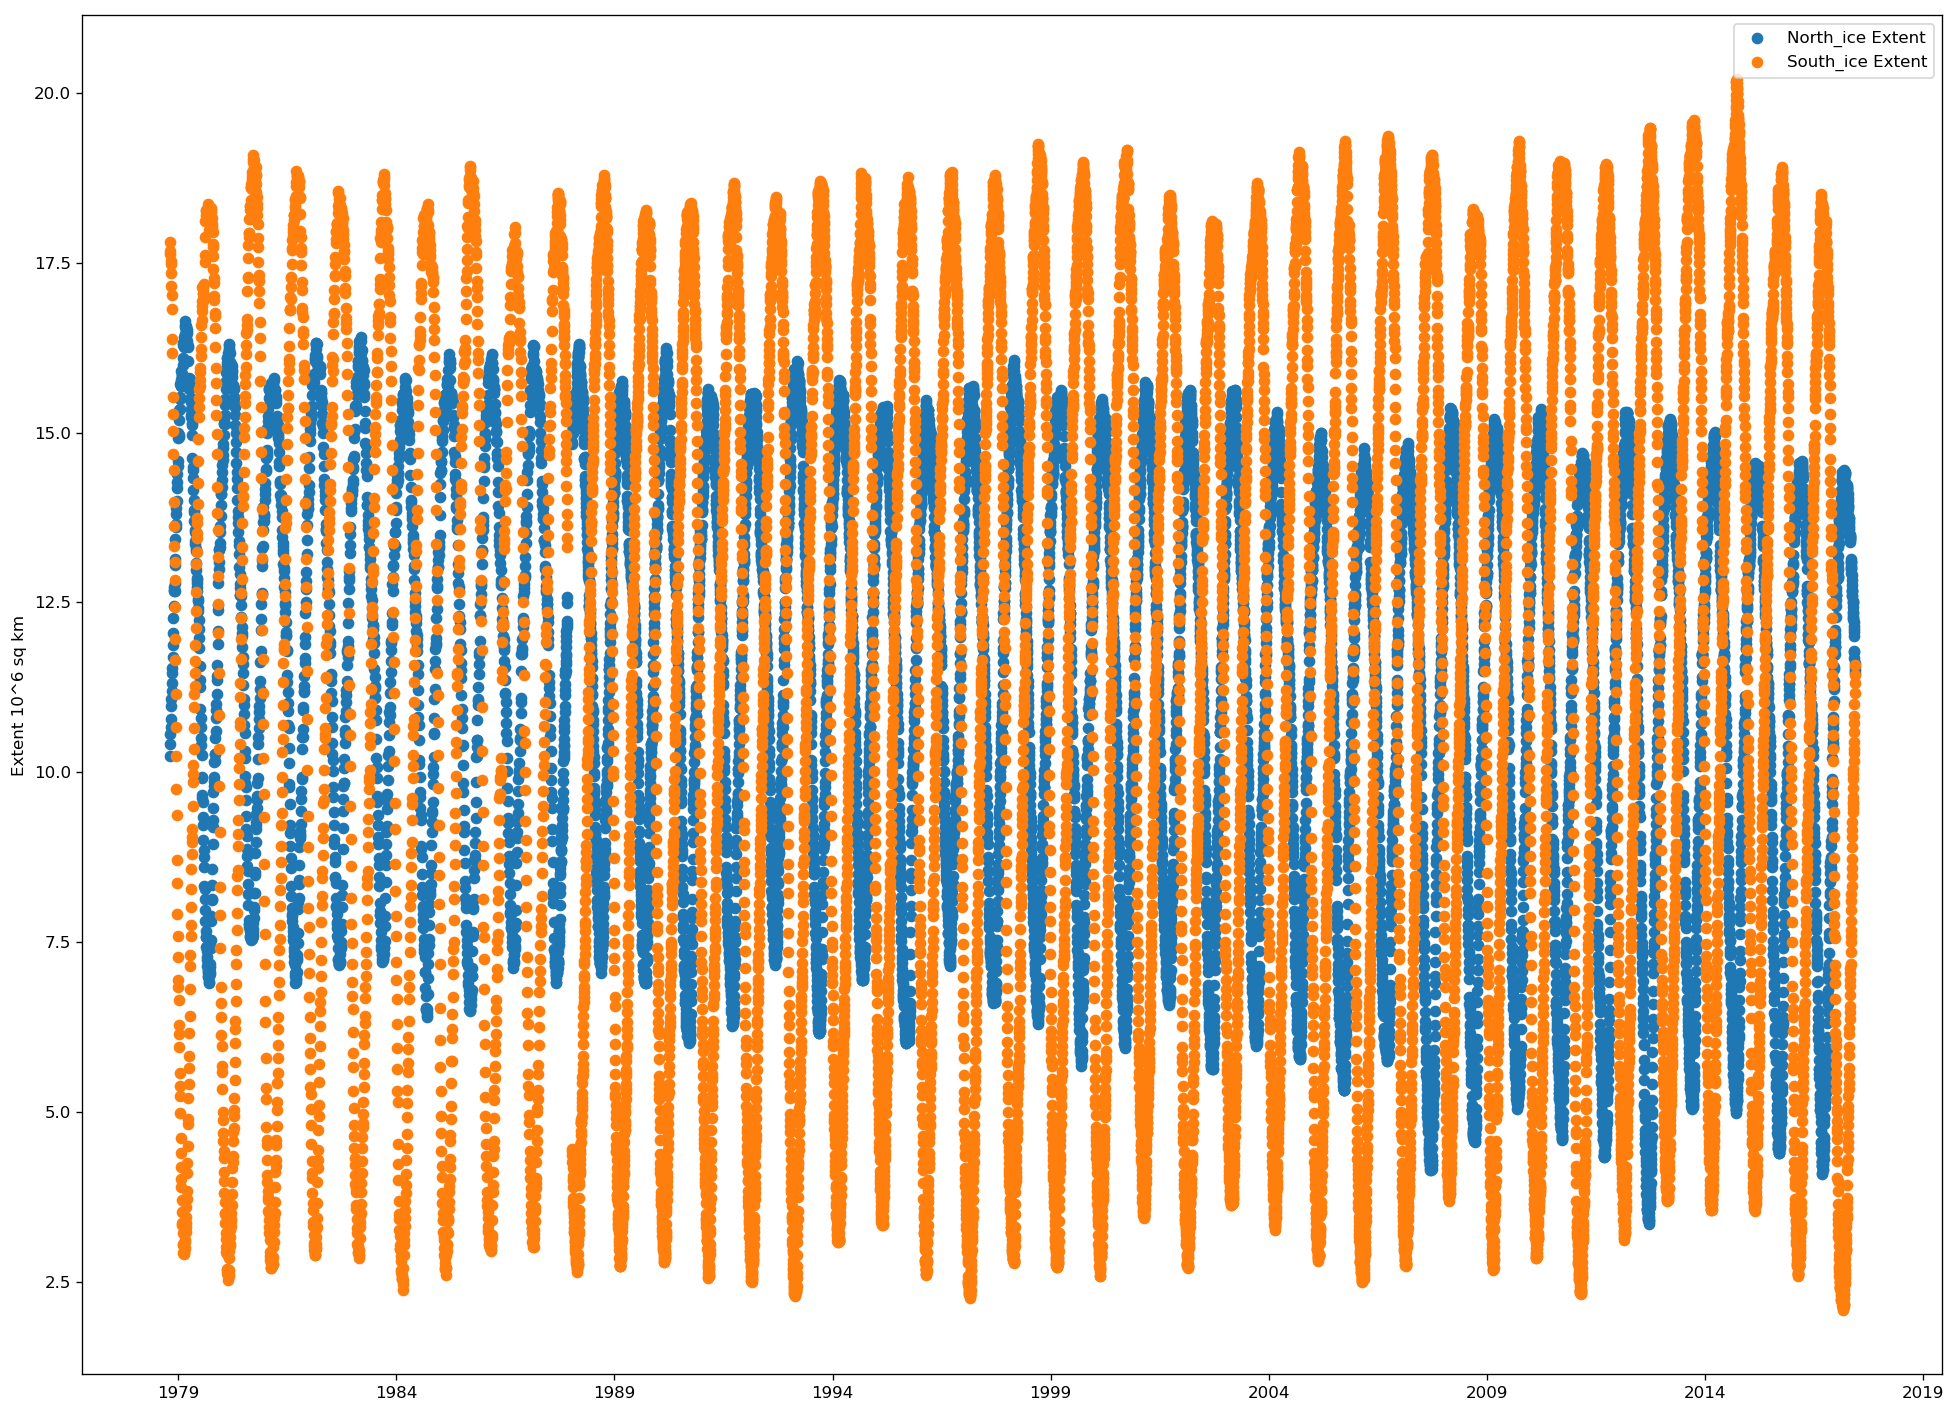

In [11]:
# Visual scatter
plt.figure(figsize=(20, 15), dpi=120)
plt.scatter(x=north_ice.index, y=north_ice.values, label='North_ice Extent')
plt.scatter(x=south_ice.index, y=south_ice.values, label='South_ice Extent')
plt.ylabel('Extent 10^6 sq km')
plt.legend()

In [12]:
north_ice.to_csv('./data/north_ice_extent.csv', index=True)
south_ice.to_csv('./data/south_ice_extent.csv', index=True)